In [1]:
from gvxrPython3 import gvxr
from gvxrPython3.utils import plotScreenshot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm # Look up table
from matplotlib.colors import PowerNorm # Look up table
import SimpleITK as sitk
import os
import sys

K3D is not install, you won't be able to visualise the 3D scene using k3D
spekpy is not install, you won't be able to load a beam spectrum using spekpy
xpecgen is not install, you won't be able to load a beam spectrum using xpecgen


In [ ]:
patientNumber = sys.argv[1]
view = sys.argv[2]
inputMeshPath = f"input_files\\pacient_{patientNumber}\\pacient{patientNumber}PanevMesh.stl"

In [23]:
gvxr.createOpenGLContext()
gvxr.setSourcePosition(0., -1000., 0., "mm")
gvxr.usePointSource()
gvxr.addFilter("Al", 1., "mm")
gvxr.addFilter("Cu", 0.1, "mm")

gvxr.setMonoChromatic(80., "keV", 1000)
gvxr.setDetectorPosition(0., -100., 0., "mm")
gvxr.setDetectorUpVector(0, 0, -1)
gvxr.setDetectorNumberOfPixels(1000, 1000)
gvxr.setDetectorPixelSize(0.3048, 0.3048, "mm")
gvxr.setScintillator("CsI", 600, "um")

In [24]:
gvxr.loadMeshFile("panev", "pacient09Mesh.stl", "mm")

In [25]:
# gvxr.rotateNode("panev", -45.0, 1., 0., 0.)
gvxr.moveToCentre("panev")
gvxr.setMixture("panev", [1, 6, 7, 8, 11, 12, 15, 16, 20], 
                [0.034, 0.155, 0.042, 0.435, 0.001, 0.002, 0.103, 0.003, 0.225])
gvxr.setDensity("panev", 1.920, "g/cm3")

In [15]:
xrayImage = np.array(gvxr.computeXRayImage()).astype(np.float32)

In [16]:
totalEnergyInMeV = gvxr.getTotalEnergyWithDetectorResponse()
white = np.ones(xrayImage.shape) * totalEnergyInMeV
dark = np.zeros(xrayImage.shape)

xrayImageFlat = (xrayImage - dark) / (white - dark)

In [17]:
xrayImageFlipped = np.fliplr(xrayImage)
xrayImageFlatFlipped = np.fliplr(xrayImageFlat)
sitkXrayImage = sitk.GetImageFromArray(xrayImageFlipped)
# sitk.WriteImage(sitkXrayImage, f"pacient09Intraop{view}.mha")

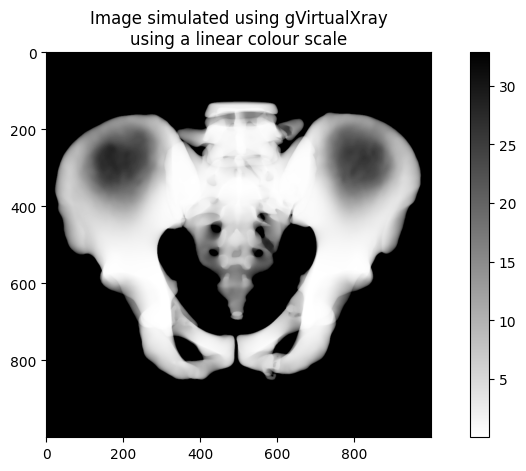

In [18]:
plt.figure(figsize=(10, 5))
plt.title("Image simulated using gVirtualXray\nusing a linear colour scale")
plt.imshow(xrayImageFlipped, cmap="gray_r")
plt.colorbar(orientation='vertical')
plt.show()

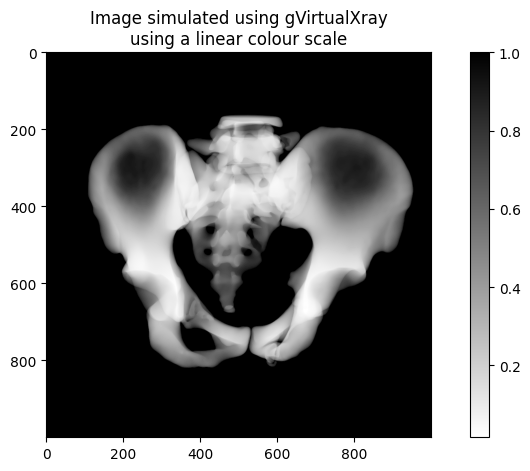

In [42]:
plt.figure(figsize=(10, 5))
plt.title("Image simulated using gVirtualXray\nusing a linear colour scale")
plt.imshow(xrayImageFlatFlipped, cmap="gray_r")
plt.colorbar(orientation='vertical')
plt.show()

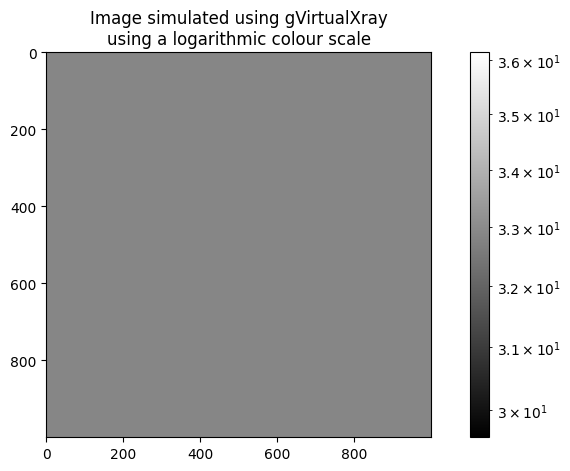

In [9]:
plt.figure(figsize=(10, 5))
plt.title("Image simulated using gVirtualXray\nusing a logarithmic colour scale")
plt.imshow(xrayImage, cmap="gray", norm=LogNorm(vmin=xrayImage.min(), vmax=xrayImage.max()))
plt.colorbar(orientation='vertical')
plt.show()

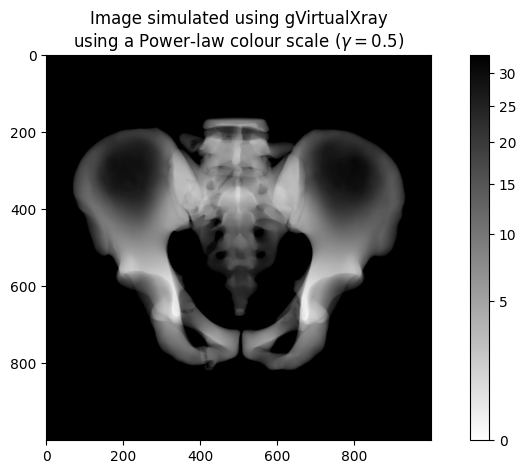

In [9]:
plt.figure(figsize=(10, 5))
plt.title("Image simulated using gVirtualXray\nusing a Power-law colour scale ($\gamma=0.5$)")
plt.imshow(xrayImage, cmap="gray_r", norm=PowerNorm(gamma=1./2.))
plt.colorbar(orientation='vertical')
plt.show()

In [16]:
sitkImage = sitk.GetImageFromArray(imFlipped)
sitk.WriteImage(sitkXrayImage, "pacient09IntraOpDrr.mha")

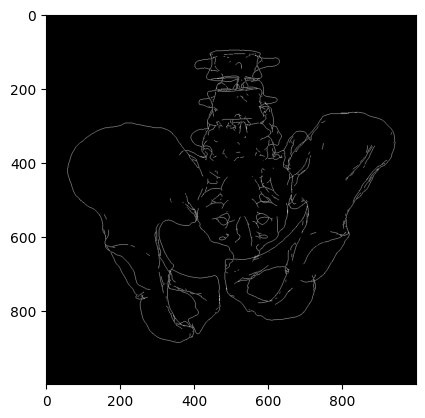

In [58]:
sitkImageEdges = sitk.CannyEdgeDetection(sitkImage, lowerThreshold=0.9, upperThreshold=1)
plt.imshow(sitk.GetArrayViewFromImage(sitkImageEdges), cmap="gray")

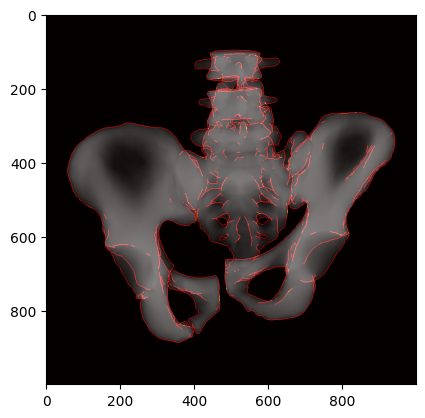

In [59]:
plt.imshow(xrayImage, cmap="gray_r")
plt.imshow(sitk.GetArrayViewFromImage(sitkImageEdges), cmap="hot", alpha=0.5)

In [9]:
sitkXrayImage = sitk.GetImageFromArray(xrayImageFlat)

In [11]:
sitk.WriteImage(sitkXrayImage, "pacient09IntraOpDrr.mha")

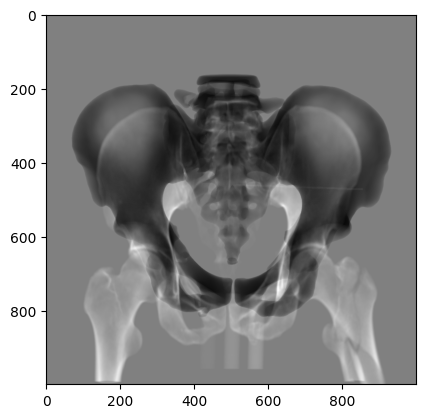

In [43]:
plt.imshow(sitk.GetArrayViewFromImage(sitkXrayImage), cmap="gray")
plt.imshow(sitk.GetArrayViewFromImage(mhaImage)[0, ...], cmap="gray", alpha=0.5)